### Задание 1. К алгоритму kNN, реализованному на уроке, реализуйте добавление весов соседей по любому из показанных на уроке принципов.

In [12]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [21]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

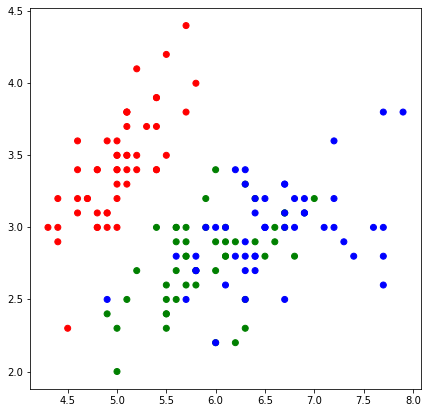

In [24]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [30]:
def e_metrics(x1, x2):
    distance = np.sum(np.square(x1 - x2))
    return np.sqrt(distance)

In [31]:
def accuracy(pred, y):
    return(sum(pred == y) / len(y))

In [35]:
def knn(x_train, y_train, x_test, k):
    answers = []
    for x in x_test:
        test_distances = []
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            test_distances.append((distance, y_train[i]))
            
        classes = {class_item: 0 for class_item in set(y_train)}    
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers    

In [36]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Точность алгоритма при k = 1: 0.667
(59400, 2)


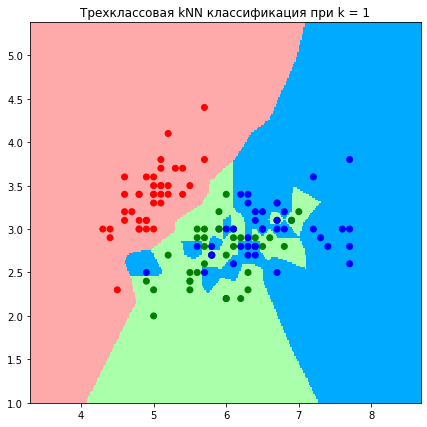

In [37]:
k = 1
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 3: 0.733
(59400, 2)


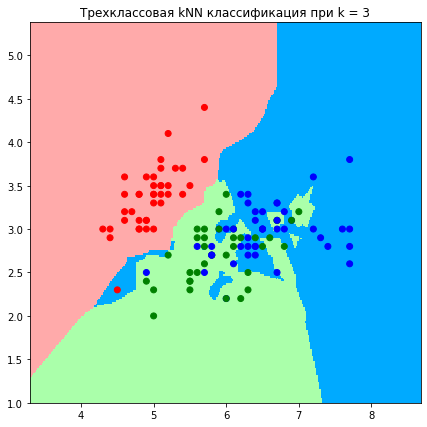

In [38]:
k = 3
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 5: 0.867
(59400, 2)


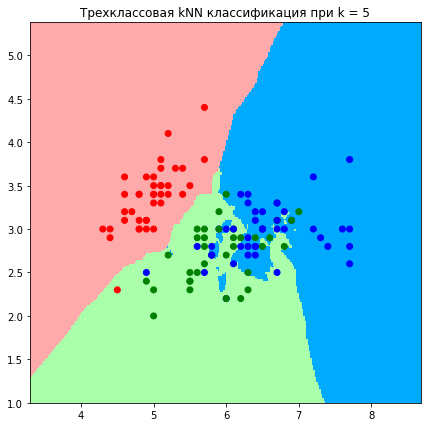

In [39]:
k = 5
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 10: 0.833
(59400, 2)


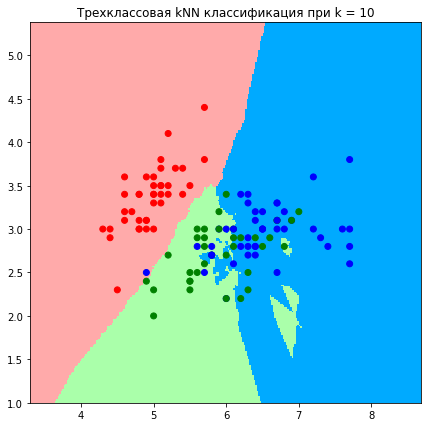

In [40]:
k = 10
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Добавляем веса соседей

- $w(d) = q^{d}$,   $q \in (0,1)$

In [43]:
def knn2(x_train, y_train, x_test, k, q):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0:k]:
            weight = q**d[0]
            classes[d[1]] += weight
            
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [44]:
def get_graph2(X_train, y_train, k, q):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = knn2(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q)

    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Точность алгоритма при k = 1, q = 0.75: 0.667


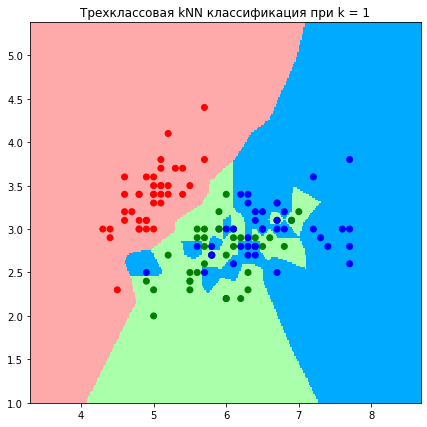

In [47]:
k, q = 1, 0.75
y_pred = knn2(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')
get_graph2(X_train, y_train, k, q)

Точность алгоритма при k = 3, q = 0.75: 0.733


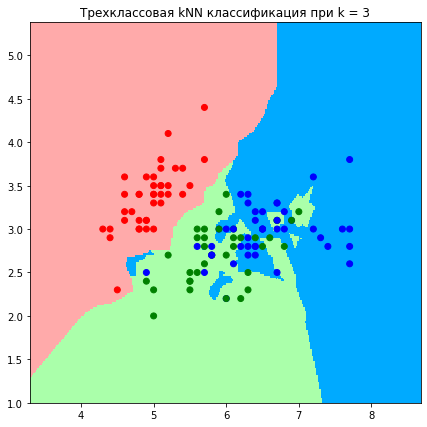

In [48]:
k, q = 3, 0.75
y_pred = knn2(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')
get_graph2(X_train, y_train, k, q)

Точность алгоритма при k = 5, q = 0.75: 0.867


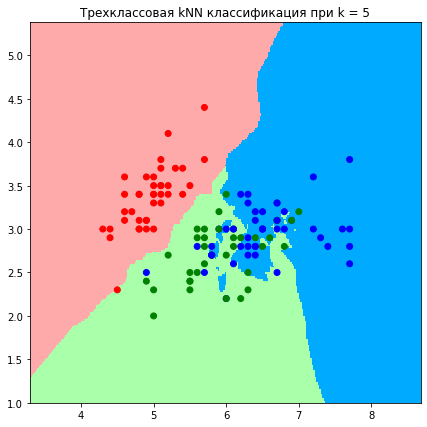

In [49]:
k, q = 5, 0.75
y_pred = knn2(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')
get_graph2(X_train, y_train, k, q)

Точность алгоритма при k = 10, q = 0.75: 0.867


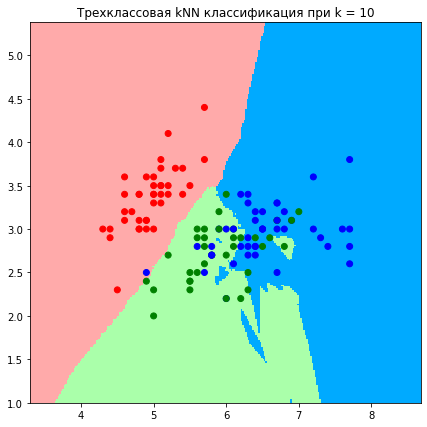

In [50]:
k, q = 10, 0.75
y_pred = knn2(X_train, y_train, X_test, k, q)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')
get_graph2(X_train, y_train, k, q)

- $w(i) = \frac{1}{i}$

In [51]:
def knn3(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}

        for i, d in enumerate(sorted(test_distances)[0:k]):
            weight = 1/(i+1)
            classes[d[1]] += weight
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [52]:
def get_graph3(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = knn3(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Точность алгоритма при k = 1, q = 0.75: 0.667


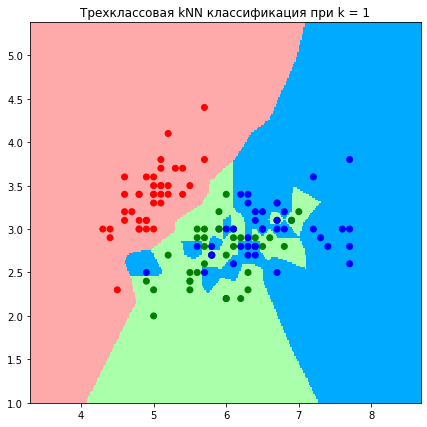

In [53]:
k = 1
y_pred = knn3(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')
get_graph3(X_train, y_train, k)

Точность алгоритма при k = 3, q = 0.75: 0.667


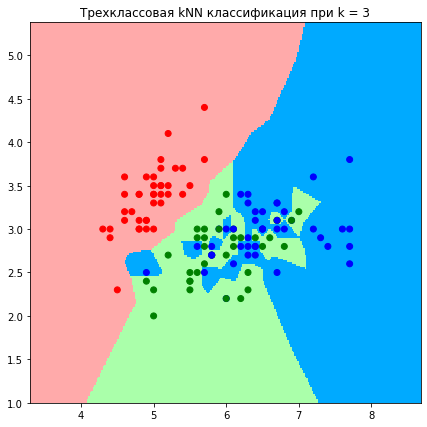

In [54]:
k = 3
y_pred = knn3(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')
get_graph3(X_train, y_train, k)

Точность алгоритма при k = 5, q = 0.75: 0.733


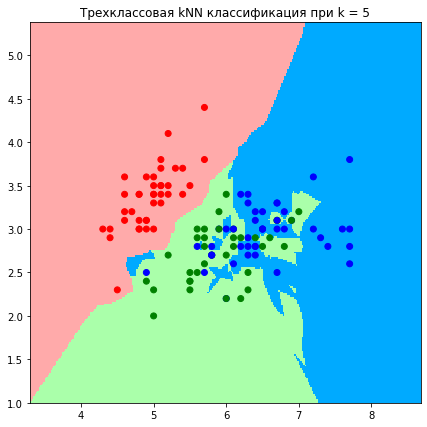

In [55]:
k = 5
y_pred = knn3(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')
get_graph3(X_train, y_train, k)

Точность алгоритма при k = 10, q = 0.75: 0.767


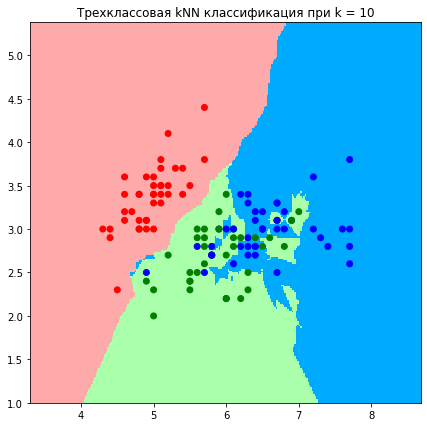

In [56]:
k = 10
y_pred = knn3(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')
get_graph3(X_train, y_train, k)

### Задание 2. Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.

In [1]:
from sklearn.datasets import make_blobs, make_moons

X1, y1 = make_blobs(n_samples=100, random_state=1)
X2, y2 = make_moons(n_samples=100, noise=0.05, random_state=1)

In [6]:
def kmeans(data, k, max_iterations, min_distance):
    clusters = {i: [] for i in range(k)}
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        old_centroids = centroids.copy()
        
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        if optimal:
            break
    
    return old_centroids, clusters 

In [7]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y']
    
    plt.figure(figsize=(7,7))
    
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

In [10]:
def e_metrics(x1, x2):
    distance = np.sum(np.square(x1 - x2))
    return np.sqrt(distance)

In [8]:
max_iterations = 1
min_distance = 1e-4

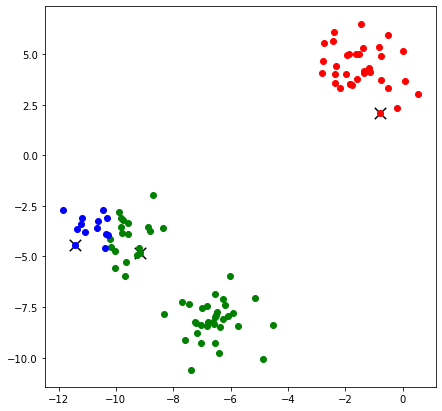

In [13]:
k = 3
centroids, clusters = kmeans(X1, k, max_iterations, min_distance)
visualize(centroids, clusters)

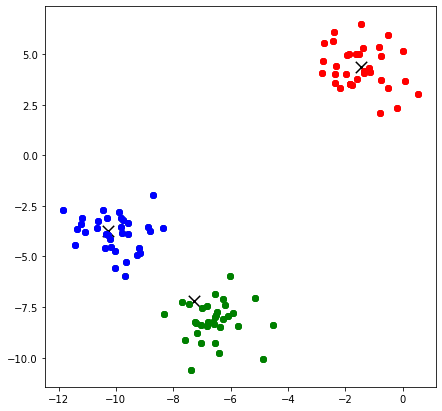

In [14]:
max_iterations = 3
centroids, clusters = kmeans(X1, k, max_iterations, min_distance)
visualize(centroids, clusters)

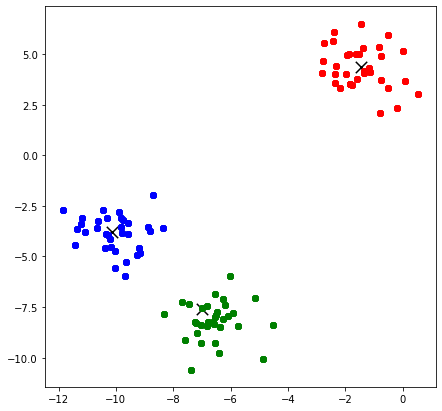

In [15]:
max_iterations = 5
centroids, clusters = kmeans(X1, k, max_iterations, min_distance)
visualize(centroids, clusters)

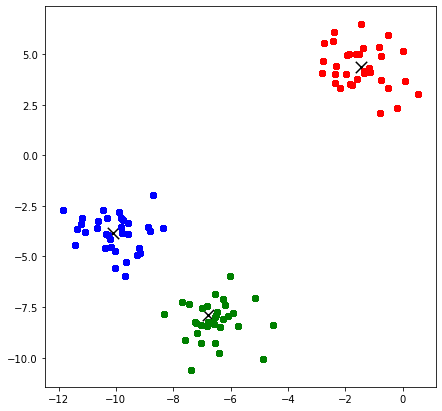

In [16]:
max_iterations = 10
centroids, clusters = kmeans(X1, k, max_iterations, min_distance)
visualize(centroids, clusters)

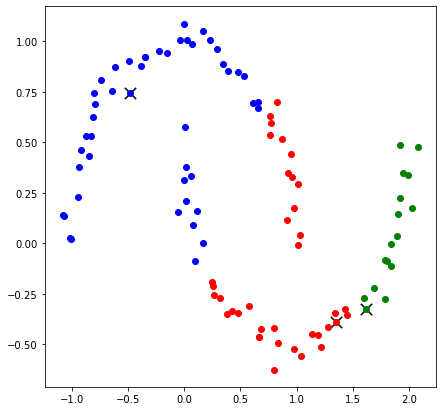

In [17]:
max_iterations = 1
centroids, clusters = kmeans(X2, k, max_iterations, min_distance)
visualize(centroids, clusters)

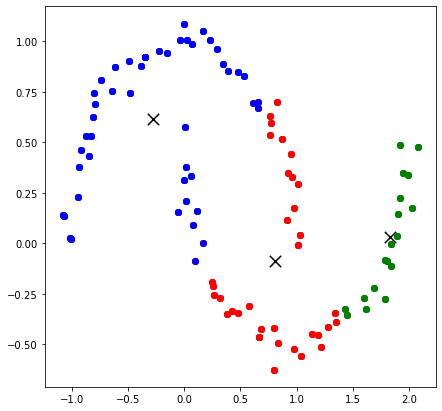

In [18]:
max_iterations = 3
centroids, clusters = kmeans(X2, k, max_iterations, min_distance)
visualize(centroids, clusters)

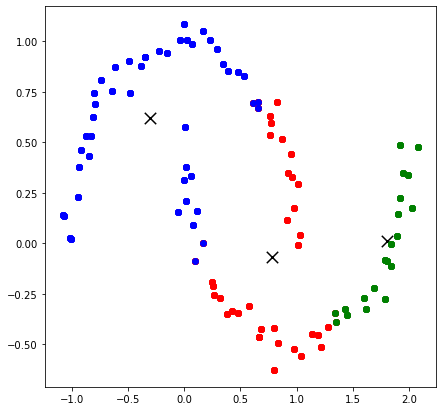

In [19]:
max_iterations = 5
centroids, clusters = kmeans(X2, k, max_iterations, min_distance)
visualize(centroids, clusters)

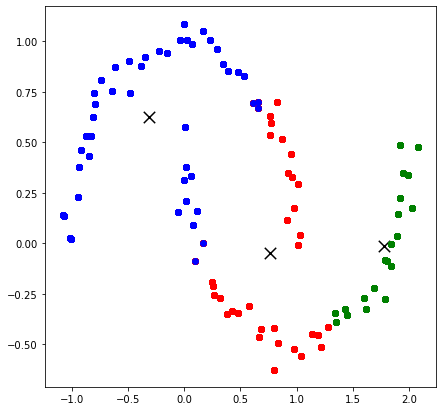

In [20]:
max_iterations = 10
centroids, clusters = kmeans(X2, k, max_iterations, min_distance)
visualize(centroids, clusters)

In [21]:
def kmeans_mse(centroids, clusters):
    ssdistances = 0
    for i in range(len(centroids)):
        for cluster in clusters[i]:
            ssdistances += e_metrics(centroids[i], cluster)
    return ssdistances

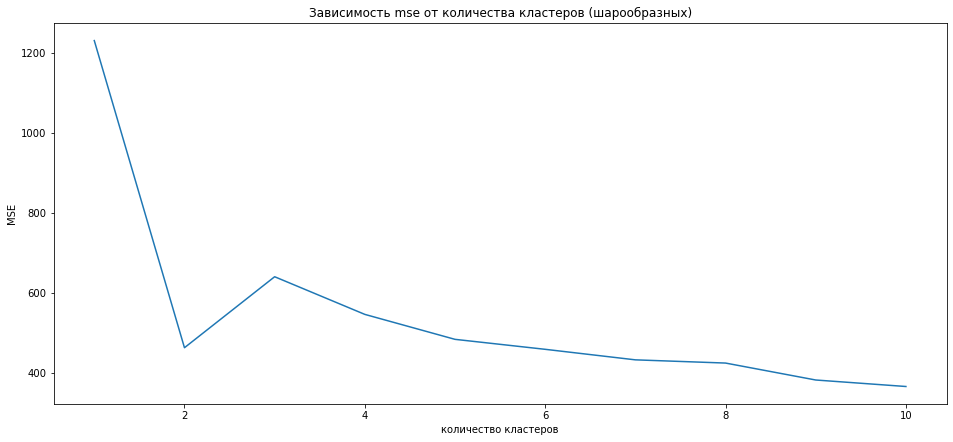

In [24]:
max_iterations = 5
min_distance = 1e-4
k = 3
nums = range(1, 11)
mse = []
for k in nums:
    centroids, clusters = kmeans(X1, k, max_iterations, min_distance)
    mse.append(kmeans_mse(centroids, clusters))

plt.figure(figsize = (16, 7))
plt.title("Зависимость mse от количества кластеров (шарообразных)")
plt.xlabel('количество кластеров')
plt.ylabel('MSE')
plt.plot(nums, mse)
plt.show()

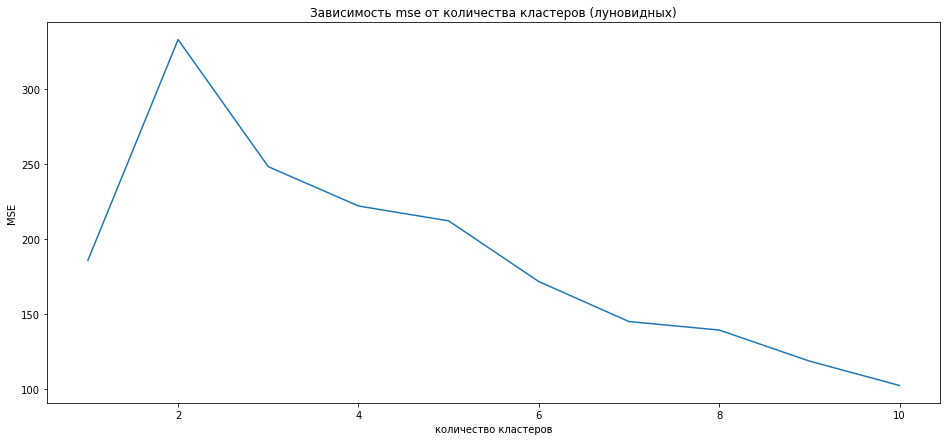

In [25]:
max_iterations = 5
min_distance = 1e-4
k = 3
nums = range(1, 11)
mse = []
for k in nums:
    centroids, clusters = kmeans(X2, k, max_iterations, min_distance)
    mse.append(kmeans_mse(centroids, clusters))

plt.figure(figsize = (16, 7))
plt.title("Зависимость mse от количества кластеров (луновидных)")
plt.xlabel('количество кластеров')
plt.ylabel('MSE')
plt.plot(nums, mse)
plt.show()